# Nhóm 6:
## Thành viên nhóm:
| MSSV         | Tên              | Gmail                |
|--------------|------------------|----------------------|
| 22120023    | Lê Nguyễn Gia Bảo (*)   | 22120023@student.hcmus.edu.vn  | 
| 22120201    | Huỳnh Mẫn         | 22120201@student.hcmus.edu.vn |
| 22120208    | Hoàng Hồ Nhật Minh      | 22120208@student.hcmus.edu.vn |
| 22120216    | Bùi Tấn Thành Nam       | 22120216@student.hcmus.edu.vn |
| 22120295    | Hồ Minh Quang           | 22120295@student.hcmus.edu.vn |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('data-vn.xlsx', sheet_name='Data')
data.head()

,Khu vực,Số người,Thu nhập,Chi tiêu,Chi ăn uống
0,Thành thị,1,186.0,71.2,43.7
1,Thành thị,1,18.0,19.2,14.7
2,Thành thị,1,61.5,15.0,11.9
3,Thành thị,1,48.1,57.9,46.9
4,Thành thị,1,30.0,20.6,13.7


In [3]:
def mean(col):
    return col.mean()

def std(col):
    return col.std()

def std(col):
    return col.std()

def lower_quartile(col):
    return (col.quantile(0.25))

def median(col):
    return (col.median())

def upper_quartile(col):
    return (col.quantile(0.75))

In [4]:
num_cols = data.select_dtypes(include=np.number)
num_cols_stats = num_cols.agg([mean, std, 'min', lower_quartile, median, upper_quartile, 'max'])
num_cols_stats.round(2)

,Số người,Thu nhập,Chi tiêu,Chi ăn uống
mean,3.90,142.03,103.88,75.33
std,1.52,110.48,79.14,52.25
min,1.00,5.50,4.20,3.50
lower_quartile,3.00,66.42,51.08,37.58
median,4.00,111.10,81.50,59.50
upper_quartile,5.00,185.77,132.18,99.32
max,9.00,782.50,571.20,296.40


In [5]:
data.describe()

,Số người,Thu nhập,Chi tiêu,Chi ăn uống
count,420.000000,420.000000,420.000000,420.000000
mean,3.904762,142.034524,103.881905,75.329762
std,1.518533,110.477344,79.139046,52.249685
min,1.000000,5.500000,4.200000,3.500000
25%,3.000000,66.425000,51.075000,37.575000
50%,4.000000,111.100000,81.500000,59.500000
75%,5.000000,185.775000,132.175000,99.325000
max,9.000000,782.500000,571.200000,296.400000


In [6]:
def n_unique(col):
    return col.nunique()

def n_values(col):
    return col.value_counts().to_dict()

In [7]:
cat_cols = data.select_dtypes(exclude=np.number)
cat_cols_stats = cat_cols.agg([n_unique, n_values])

In [8]:
value_counts_dict = cat_cols_stats.loc["n_values", "Khu vực"]
cat_cols_stats = pd.DataFrame(value_counts_dict.items(), columns=["Giá trị", "Số lượng"])

In [9]:
cat_cols_stats

,Giá trị,Số lượng
0,Nông thôn,237
1,Thành thị,183


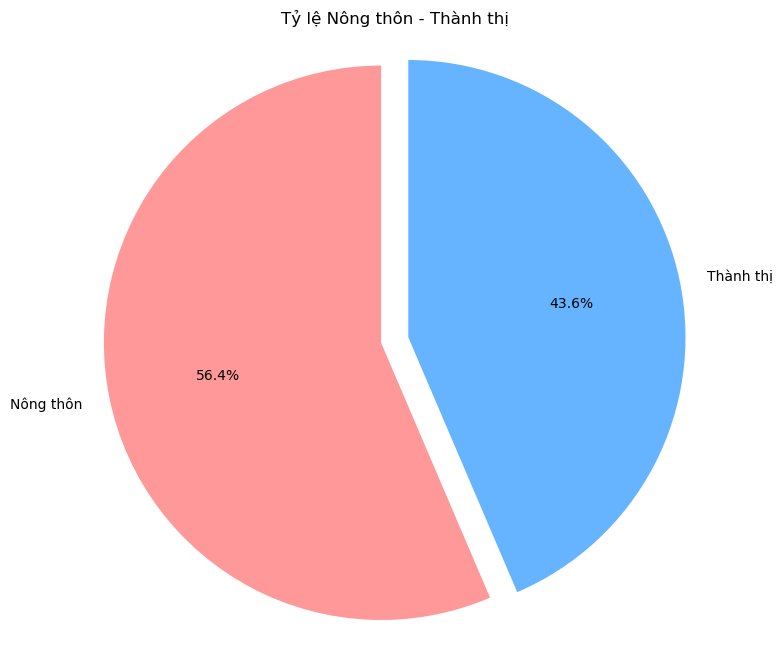

In [10]:
# ...existing code...

# Data for the pie chart
labels = ["Nông thôn", "Thành thị"]
sizes = [237, 183]  # Số lượng tương ứng
colors = ["#ff9999", "#66b3ff"]  # Màu sắc cho từng phần
explode = (0.1, 0)  # Tách phần "Nông thôn" ra một chút

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Tỷ lệ Nông thôn - Thành thị")
plt.axis("equal")  # Đảm bảo biểu đồ tròn
plt.show()

### Bảng encoding biểu đồ:

| **Thuộc tính dữ liệu**         | **Kênh mã hóa (Encoding Channel)** | **Kiểu mã hóa (Visual Encoding)**                                      |
|--------------------------------|-------------------------------------|------------------------------------------------------------------------|
| Khu vực (Nông thôn/Thành thị)  | Màu sắc (Color)                    | Mỗi khu vực có một màu khác nhau (ví dụ: đỏ nhạt, xanh dương)          |
| Số lượng                       | Diện tích (Area)                   | Kích thước lát cắt của biểu đồ tròn thể hiện số lượng                  |
| Tỷ lệ phần trăm (%)            | Nhãn (Text Label)                  | Hiển thị giá trị phần trăm trên từng lát cắt                          |
| Khu vực có số lượng lớn nhất   | Popout (Explode)                   | Lát cắt lớn nhất được đẩy ra ngoài để nhấn mạnh                       |

### Nhận xét nội dung từ biểu đồ

- **Phân bố dân số**:
  - Khu vực **Nông thôn** chiếm tỷ lệ lớn hơn với **237 người**, tương đương **56.4%** tổng số.
  - Khu vực **Thành thị** có **183 người**, chiếm **43.6%**.

- **Ý nghĩa**:
  - Số lượng người ở khu vực Nông thôn cao hơn so với Thành thị, cho thấy sự tập trung dân cư nhiều hơn ở vùng nông thôn.
  - Điều này có thể phản ánh đặc điểm kinh tế, xã hội hoặc cơ cấu dân số của khu vực được khảo sát.

- **Ứng dụng**:
  - Thông tin này có thể được sử dụng để lập kế hoạch phát triển kinh tế, phân bổ nguồn lực hoặc xây dựng chính sách phù hợp với từng khu vực.